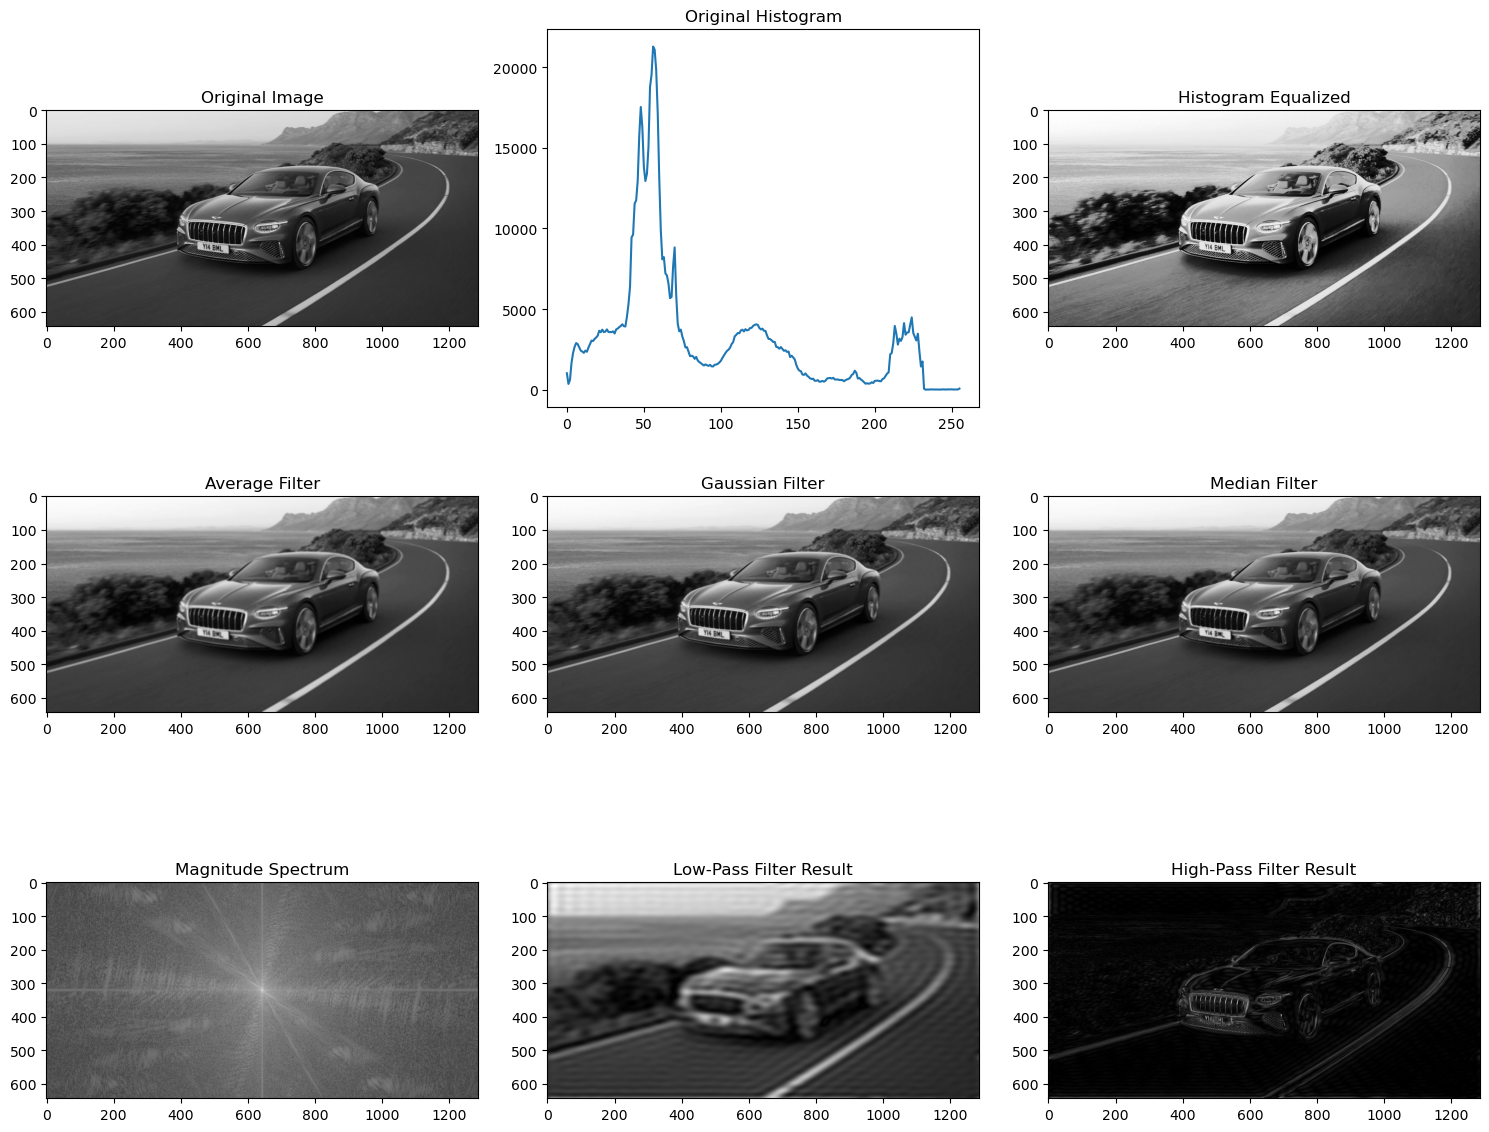

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("sample1.jpg", cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found!")
    exit()

hist_original = cv2.calcHist([image], [0], None, [256], [0,256])

equalized = cv2.equalizeHist(image)
hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0,256])

avg_filter = cv2.blur(image, (5,5))

gaussian_filter = cv2.GaussianBlur(image, (5,5), 0)

median_filter = cv2.medianBlur(image, 5)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

rows, cols = image.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows, cols, 2), np.uint8)
r = 30  
cv2.circle(mask, (ccol, crow), r, (1,1,1), -1)

low_pass = dft_shift * mask
f_ishift = np.fft.ifftshift(low_pass)
img_low_pass = cv2.idft(f_ishift)
img_low_pass = cv2.magnitude(img_low_pass[:,:,0], img_low_pass[:,:,1])

mask_high = 1 - mask
high_pass = dft_shift * mask_high
f_ishift2 = np.fft.ifftshift(high_pass)
img_high_pass = cv2.idft(f_ishift2)
img_high_pass = cv2.magnitude(img_high_pass[:,:,0], img_high_pass[:,:,1])

plt.figure(figsize=(15,12))

# Original and histogram
plt.subplot(3,3,1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(3,3,2), plt.plot(hist_original), plt.title("Original Histogram")
plt.subplot(3,3,3), plt.imshow(equalized, cmap='gray'), plt.title("Histogram Equalized")

# Spatial Filters
plt.subplot(3,3,4), plt.imshow(avg_filter, cmap='gray'), plt.title("Average Filter")
plt.subplot(3,3,5), plt.imshow(gaussian_filter, cmap='gray'), plt.title("Gaussian Filter")
plt.subplot(3,3,6), plt.imshow(median_filter, cmap='gray'), plt.title("Median Filter")

# Frequency Domain
plt.subplot(3,3,7), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Magnitude Spectrum")
plt.subplot(3,3,8), plt.imshow(img_low_pass, cmap='gray'), plt.title("Low-Pass Filter Result")
plt.subplot(3,3,9), plt.imshow(img_high_pass, cmap='gray'), plt.title("High-Pass Filter Result")

plt.tight_layout()
plt.show()
